In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [4]:
df = pd.read_csv('Training_Data_Set.csv')

In [5]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [7]:
df.sort_values('seat_count')[['seat_count']]

,seat_count
8056,1
32914,2
39986,2
39987,2
1769,2
...,...
12458,None
39872,None
46333,None
39874,None


In [8]:
df.sort_values('door_count')[['door_count']]

,door_count
12051,1
11862,1
3630,2
3329,2
41207,2
...,...
22977,None
22970,None
45798,None
22956,None


In [9]:
df['door_count'].replace('None',0,inplace=True)

In [10]:
df['door_count']=df['door_count'].astype(int)

In [11]:
df['door_count'].replace(0,df['door_count'].median(),inplace=True)

In [12]:
df['door_count'].median()

4.0

In [13]:
df['seat_count'].replace('None',0,inplace=True)

In [14]:
df['seat_count']=df['seat_count'].astype(int)

In [15]:
df['seat_count'].replace(0,df['seat_count'].median(),inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  int32  
 14  seat_count           53515 non-null  int32  
 15  fuel_type            53515 non-null 

In [17]:
df.head(3)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,4,5,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50


In [18]:
df['Vroom Audit Rating'].nunique()

5

In [19]:
df['Vroom Audit Rating'].unique()

array([8, 6, 7, 4, 5], dtype=int64)

In [20]:
df['Maker'].nunique()

8

In [21]:
df['Location'].nunique()

11

In [22]:
df['manufacture_year'].nunique()

55

In [23]:
df['engine_displacement'].nunique()

555

In [24]:
df['Distance '].max()-df['Distance '].min()

9899800.0

In [25]:
df['model'].nunique()

23

### Preprecessing

### Null values imputation

In [26]:
df['Distance '].median()

65520.0

In [27]:
df['Distance '].mean()

94546.2624464668

In [28]:
df['Distance '].isnull().sum()

1211

In [29]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)

In [30]:
df['engine_power'].median()

91.0

In [31]:
df['engine_power'].mean()

100.44834472693755

In [32]:
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)

In [33]:
df['engine_power'].isnull().sum()

0

In [34]:
Vroom_Audit_Rating = pd.get_dummies(df['Vroom Audit Rating'],prefix='Rating')

In [35]:
Vroom_Audit_Rating.head(3)

,Rating_4,Rating_5,Rating_6,Rating_7,Rating_8
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0


In [36]:
Owner_type = pd.get_dummies(df['Owner Type'])

In [37]:
Owner_type.head(3)

,First,Fourth & Above,Second,Third
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1


In [38]:
transmission = pd.get_dummies(df['transmission'])

In [39]:
transmission.head(3)

,auto,man
0,0,1
1,0,1
2,1,0


In [40]:
fuel_type = pd.get_dummies(df['fuel_type'])

In [41]:
fuel_type.head(5)

,diesel,petrol
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


- Done one hot encoding
- below Label encoding and scaling

In [42]:
le =LabelEncoder()

In [43]:
Maker = pd.DataFrame(le.fit_transform(df['Maker']))

In [44]:
Maker.columns = ['Maker']

In [45]:
Maker.head(3)

,Maker
0,6
1,2
2,1


In [46]:
logtrans = FunctionTransformer(np.log1p)

In [47]:
Distance_scaled = pd.DataFrame(logtrans.fit_transform(df['Distance ']))

In [48]:
stdsc = StandardScaler()

In [49]:
Distance_stdsc = pd.DataFrame(stdsc.fit_transform(df[['Distance ']]))

In [50]:
Distance_stdsc.min()

0   -0.344602
dtype: float64

In [51]:
Distance_stdsc.isnull().sum()

0    0
dtype: int64

In [52]:
df['Distance '].min()

0.0

In [53]:
df['Distance '].max()

9899800.0

In [54]:
Distance_scaled.min()

Distance     0.0
dtype: float64

In [55]:
Distance_scaled.max()

Distance     16.108025
dtype: float64

In [56]:
Model = pd.DataFrame(le.fit_transform(df['model']))

In [57]:
Model.columns = ['Model']

In [58]:
Model.head()

,Model
0,8
1,9
2,18
3,6
4,20


- Drop body type
- large null values

In [59]:
df.drop('body_type',axis=1,inplace=True)

### Dropping encoded features

In [60]:
df.drop(['Owner Type','transmission','Vroom Audit Rating','fuel_type','Maker','model'],axis=1,inplace=True)

In [61]:
df.drop('Id',axis=1,inplace=True)

### Inserting encoded features

In [62]:
Price = df[['Price']]

In [63]:
df.drop('Price',axis=1,inplace=True)

In [64]:
df = pd.concat((df,Vroom_Audit_Rating),axis=1)

In [65]:
df.head(3)

,Location,Distance,manufacture_year,Age of car,engine_displacement,engine_power,door_count,seat_count,Rating_4,Rating_5,Rating_6,Rating_7,Rating_8
0,Ahmedabad,65520.0,1964,55,1964,147.0,4,5,0,0,0,0,1
1,Ahmedabad,27750.0,2012,7,1242,51.0,4,4,0,0,1,0,0
2,Hyderabad,46000.0,2014,5,1995,105.0,4,5,0,0,0,1,0


In [66]:
df = pd.concat((df,Owner_type),axis=1)

In [67]:
df = pd.concat((df,fuel_type),axis=1)

In [68]:
df = pd.concat((df,transmission),axis=1)

In [69]:
df = pd.concat((df,Model),axis=1)

In [70]:
df = pd.concat((df,Maker),axis=1)

In [71]:
df.head(3)

,Location,Distance,manufacture_year,Age of car,engine_displacement,engine_power,door_count,seat_count,Rating_4,Rating_5,...,First,Fourth & Above,Second,Third,diesel,petrol,auto,man,Model,Maker
0,Ahmedabad,65520.0,1964,55,1964,147.0,4,5,0,0,...,0,0,1,0,0,1,0,1,8,6
1,Ahmedabad,27750.0,2012,7,1242,51.0,4,4,0,0,...,0,0,0,1,0,1,0,1,9,2
2,Hyderabad,46000.0,2014,5,1995,105.0,4,5,0,0,...,0,0,0,1,1,0,1,0,18,1


In [72]:
df.isnull().sum().sum()

0

- No null values in preprocessed dataset

### Plots

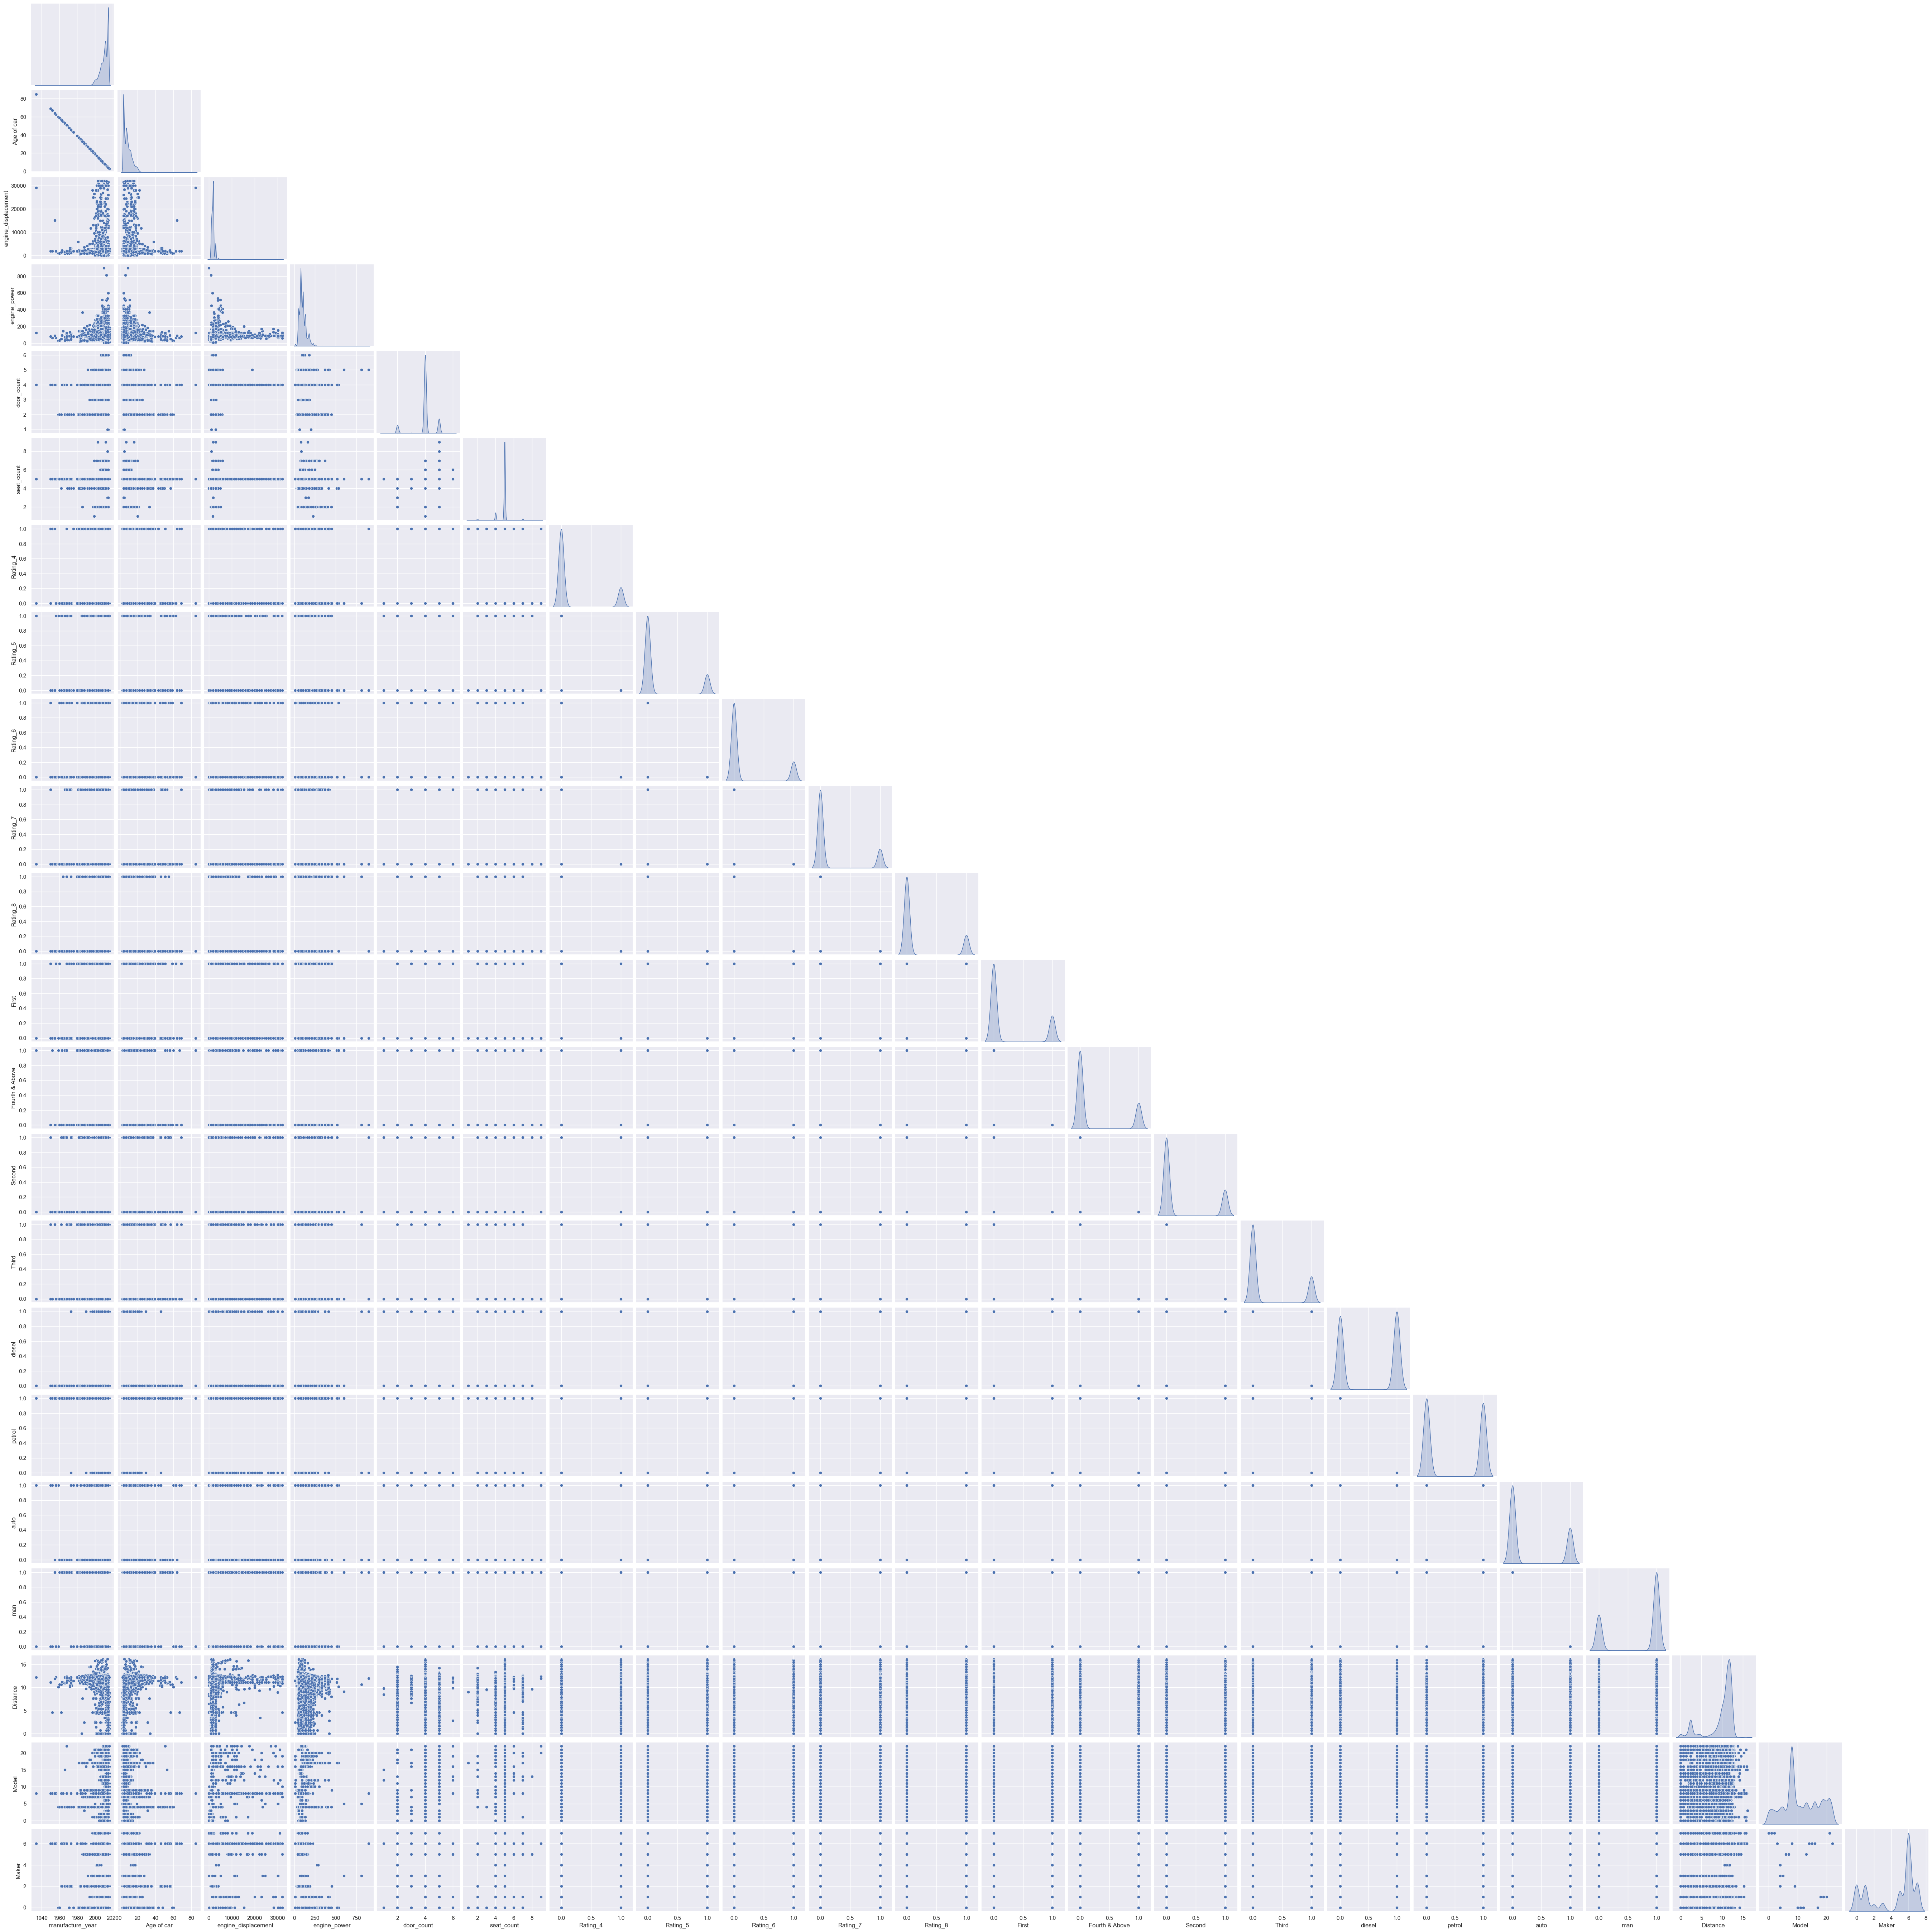

In [650]:
sns.pairplot(df,diag_kind='kde',corner=True);

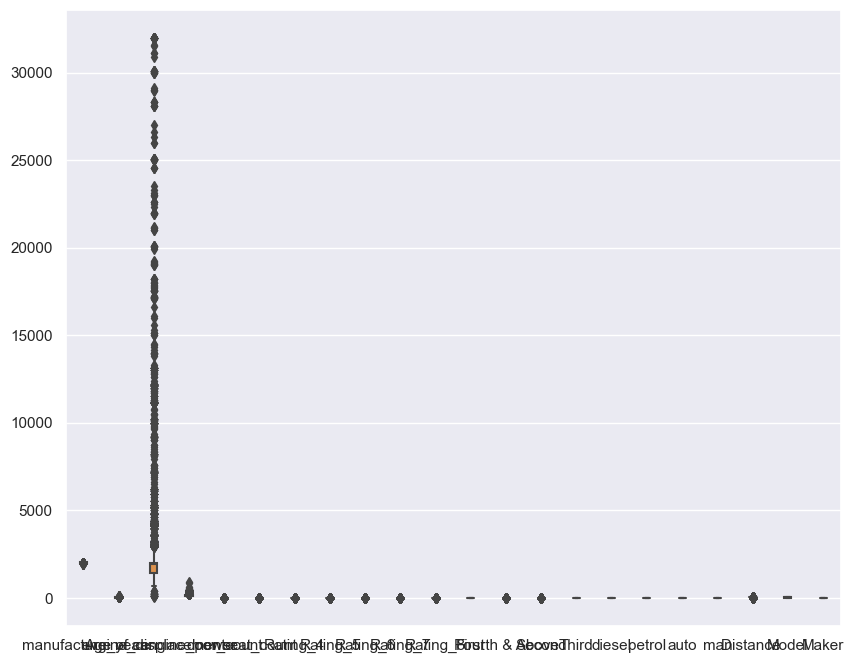

In [651]:
sns.boxplot(data=df,width=0.2);

In [73]:
df = pd.concat((df,Price),axis=1)

In [74]:
df.head(4)

,Location,Distance,manufacture_year,Age of car,engine_displacement,engine_power,door_count,seat_count,Rating_4,Rating_5,...,Fourth & Above,Second,Third,diesel,petrol,auto,man,Model,Maker,Price
0,Ahmedabad,65520.0,1964,55,1964,147.0,4,5,0,0,...,0,1,0,0,1,0,1,8,6,543764.25
1,Ahmedabad,27750.0,2012,7,1242,51.0,4,4,0,0,...,0,0,1,0,1,0,1,9,2,401819.25
2,Hyderabad,46000.0,2014,5,1995,105.0,4,5,0,0,...,0,0,1,1,0,1,0,18,1,2392855.50
3,Mumbai,43949.0,2011,8,1618,140.0,4,5,0,0,...,0,0,1,0,1,0,1,6,5,958606.50


### Heatmap

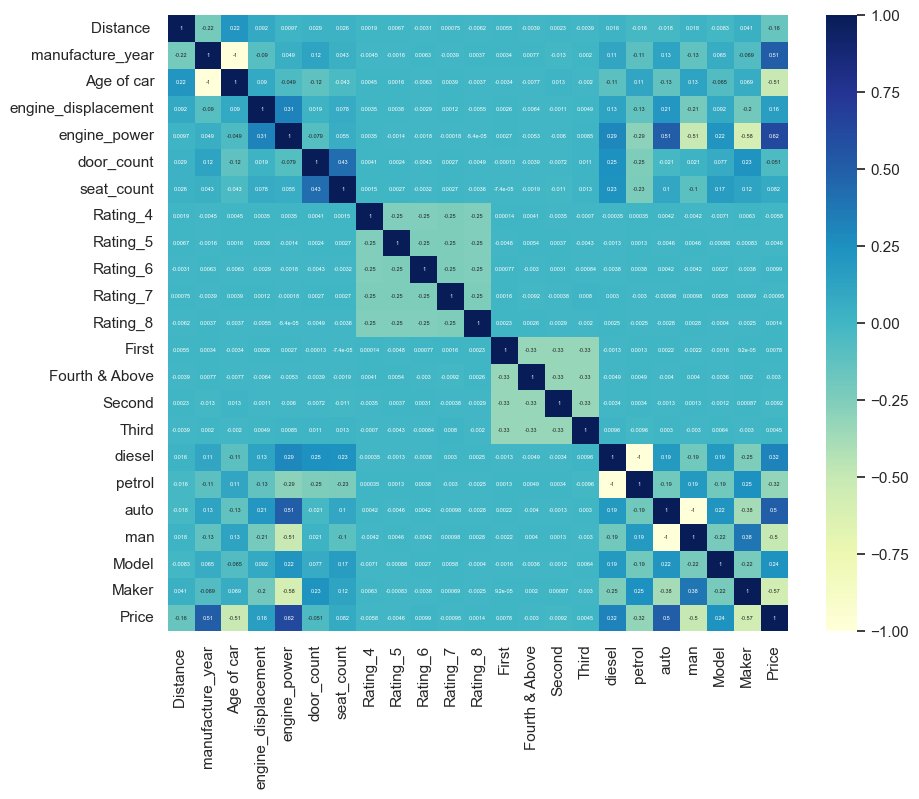

In [75]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data=df.corr(numeric_only=True),cmap='YlGnBu',annot=True,annot_kws={'size':4},);

- manufacture year,age of car,engine power,petrol,man,distance,maker

In [76]:
df.columns

Index(['Location', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'door_count', 'seat_count',
       'Rating_4', 'Rating_5', 'Rating_6', 'Rating_7', 'Rating_8', 'First',
       'Fourth & Above', 'Second', 'Third', 'diesel', 'petrol', 'auto', 'man',
       'Model', 'Maker', 'Price'],
      dtype='object')

In [125]:
X = df[['manufacture_year','Age of car','engine_power','diesel','auto','Distance ','Maker']]
y = df[['Price']]

In [126]:
X.isnull().sum().sum()

0

In [127]:
y.isnull().sum()

Price    0
dtype: int64

In [128]:
lin_reg = LinearRegression()

In [129]:
lin_reg.fit(X,y)

LinearRegression()

### Test dataset

In [130]:
test = pd.read_csv('Test_Data_Set.csv')

In [131]:
X.head()

,manufacture_year,Age of car,engine_power,diesel,auto,Distance,Maker
0,1964,55,147.0,0,0,65520.0,6
1,2012,7,51.0,0,0,27750.0,2
2,2014,5,105.0,1,1,46000.0,1
3,2011,8,140.0,0,0,43949.0,5
4,2012,7,180.0,1,1,59524.0,1


In [132]:
test.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type'],
      dtype='object')

In [133]:
test.drop(['model','Location','Owner Type','engine_displacement','body_type', 'Vroom Audit Rating', 'door_count',
       'seat_count'],axis=1,inplace=True)

In [134]:
test.head()

,Id,Maker,Distance,manufacture_year,Age of car,engine_power,transmission,fuel_type
0,11001,skoda,150000.0,2007,12,75.0,man,petrol
1,11002,skoda,29376.0,2014,5,77.0,man,diesel
2,11003,skoda,30563.0,2014,5,110.0,man,diesel
3,11004,audi,8650.0,2015,4,110.0,auto,diesel
4,11005,audi,6400.0,2015,4,169.0,auto,petrol


In [135]:
test.isnull().sum()

Id                    0
Maker                 0
Distance            128
manufacture_year      0
Age of car            0
engine_power        168
transmission          0
fuel_type             0
dtype: int64

In [136]:
test['Distance '].mean()

95890.0885729907

In [137]:
test['Distance '].median()

64000.0

In [138]:
test['Distance '].fillna(test['Distance '].median(),inplace=True)

In [139]:
test['engine_power'].mean()

99.47457315953736

In [140]:
test['engine_power'].median()

88.0

In [141]:
test['engine_power'].fillna(test['engine_power'].median(),inplace=True)

In [142]:
manufacture_year = test['manufacture_year']
Age_of_car = test['Age of car']
engine_power = test['engine_power']

In [143]:
le = LabelEncoder()

In [144]:
Maker = pd.DataFrame(le.fit_transform(test['Maker']))

In [145]:
Maker.columns = ['Maker']

In [146]:
#sc = StandardScaler()

In [147]:
#Distance = pd.DataFrame(sc.fit_transform(test[['Distance ']]))

In [148]:
#Distance.columns = ['Distance']

In [149]:
transmission = pd.get_dummies(test['transmission'])

In [150]:
transmission.drop('man',axis=1,inplace=True)

In [151]:
fuel_type = pd.get_dummies(test['fuel_type'])

In [152]:
fuel_type.drop('petrol',axis=1,inplace=True)

In [153]:
test1 = test.drop(['Id','Maker','manufacture_year','Age of car','engine_power','transmission','fuel_type'],axis=1)

In [154]:
X.head()

,manufacture_year,Age of car,engine_power,diesel,auto,Distance,Maker
0,1964,55,147.0,0,0,65520.0,6
1,2012,7,51.0,0,0,27750.0,2
2,2014,5,105.0,1,1,46000.0,1
3,2011,8,140.0,0,0,43949.0,5
4,2012,7,180.0,1,1,59524.0,1


In [155]:
distance = test['Distance ']

In [156]:
test1.drop('Distance ',axis=1,inplace=True)

In [157]:
test1 = pd.concat((test1,manufacture_year),axis=1)

In [158]:
test1 = pd.concat((test1,Age_of_car),axis=1)

In [159]:
test1 = pd.concat((test1,engine_power),axis=1)

In [160]:
test1 = pd.concat((test1,fuel_type),axis=1)

In [161]:
test1 = pd.concat((test1,transmission),axis=1)

In [162]:
test1 = pd.concat((test1,distance),axis=1)

In [163]:
test1 = pd.concat((test1,Maker),axis=1)

In [164]:
Id = test['Id']

In [165]:
test.drop('Id',axis=1,inplace=True)

In [166]:
test1.head()

,manufacture_year,Age of car,engine_power,diesel,auto,Distance,Maker
0,2007,12,75.0,0,0,150000.0,6
1,2014,5,77.0,1,0,29376.0,6
2,2014,5,110.0,1,0,30563.0,6
3,2015,4,110.0,1,1,8650.0,0
4,2015,4,169.0,0,1,6400.0,0


### Predicting the model

In [167]:
X.columns

Index(['manufacture_year', 'Age of car', 'engine_power', 'diesel', 'auto',
       'Distance ', 'Maker'],
      dtype='object')

In [168]:
test1.columns = ['manufacture_year', 'Age of car', 'engine_power', 'diesel', 'auto','Distance ', 'Maker']

In [169]:
predicted = pd.DataFrame(lin_reg.predict(test1),index=Id)

In [170]:
predicted.columns = ['Price']

In [171]:
predicted.to_csv('Out1.csv')